# Carbon emission prediction

### Download packages

In [2]:
!pip install tensorflow

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Train predictive LSTM model

In [7]:
# 定义年份和数据
year = np.array(range(1990, 2021))
data = np.array([
    605418.2, 612356.7, 595916.9, 581129.2, 575102.4, 567203.8, 586706.6, 561966.0,
    566848.5, 560260.3, 567448.4, 576019.9, 557570.3, 568822.0, 569761.6, 566156.9,
    563224.9, 554200.4, 539075.1, 488335.1, 506105.6, 463277.9, 481211.3, 471217.1,
    432218.4, 416205.2, 393399.4, 381098.8, 374024.1, 359324.7, 321087.7
])

# 将数据缩放至 [0, 1] 范围
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))


# 创建带有时间步长的数据集函数
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# 定义时间步长
time_step = 5  # 增加时间步长

# 生成带有时间步长的数据集
X, y = create_dataset(data_scaled, time_step)

# 将数据调整为 LSTM 输入格式 (samples, time_steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

# 准备训练和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=time_step, shuffle=False)

# 构建 LSTM 模型
model = Sequential()
model.add(LSTM(units=240, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1)

# 在测试集上进行预测
y_pred_scaled = model.predict(X_test)

# 反向缩放测试集和预测数据
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred_scaled)

# 计算 RMSE
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Epoch 1/100


c:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5630
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2897 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0860 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0193 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0690 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0337 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0211 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0323 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0212 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0145 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0136 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0155 
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141 
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0107 
Epoch 16/100
3/3 ━━━━━━━━━━━━━━━

### Plotting data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Future Forecast: [322111.25 306481.3  291234.   276595.1  263613.94 252979.98 241180.23
 230577.12 220995.16 212282.19 204289.06 196945.03 190385.8  184498.14
 179215.69]


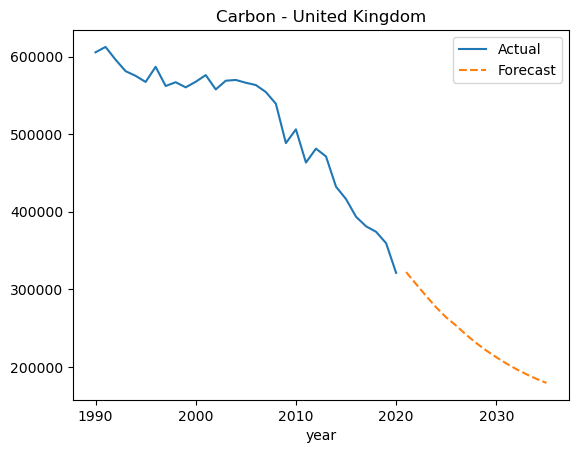

In [8]:
# Predict the data of the next 15 years
forecast_input = data_scaled[-time_step:].reshape(1, time_step, 1)
forecast = []

for _ in range(15):
    next_pred_scaled = model.predict(forecast_input)
    forecast.append(next_pred_scaled[0, 0])
    forecast_input = np.append(forecast_input[:, 1:, :], next_pred_scaled.reshape(1, 1, 1), axis=1)

# 将预测结果反向缩放
forecast_actual = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# 打印预测结果
print(f"Future Forecast: {forecast_actual.flatten()}")

# 绘制实际值和预测值
plt.plot(year, data, label='Actual')
plt.plot(range(2021, 2036), forecast_actual.flatten(), '--', label='Forecast')
plt.xlabel('year')
plt.title('Carbon - United Kingdom')
plt.legend()
plt.show()
